Imports and Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

For cleaner visuals

In [4]:
plt.style.use('seaborn-v0_8')  # or 'seaborn-v0_8-darkgrid', etc.
sns.set_palette('Set2')

Display settings

In [5]:
pd.set_option('display.max_columns', None)
#By default, Pandas hides some columns if your DataFrame has too many — it shows ... in the middle, This line disables that cutoff so you can see every column in the output.

Load Dataset

In [6]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Cleaning

Basic info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Null value check

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Fill missing values or drop where needed

In [9]:
df['country']=df['country'].fillna('Unknown')
df['director']=df['director'].fillna('Unknown')
df['cast']=df['cast'].fillna('Unknown')
df['rating']=df['rating'].fillna('Unknown')
df.dropna(subset=['date_added'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Convert date_added to datetime

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'], errors="coerce")

Extract year from date_added

In [12]:
df['year_added'] = df['date_added'].dt.year

# Movies vs. TV Shows Distribution

C:\Users\ARATI\AppData\Local\Temp\ipykernel_14596\135751444.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


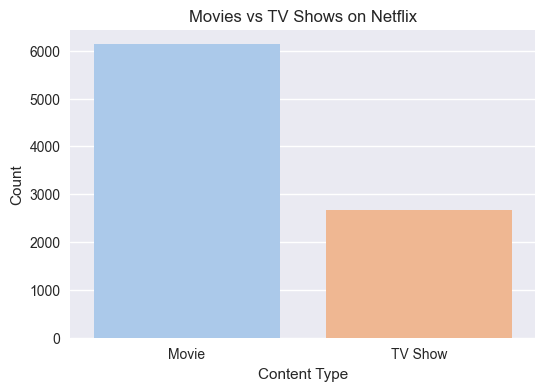

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='pastel')
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

# Genre Distribution (Top 15)

Genre count

In [14]:
genre_series = df['listed_in'].dropna().str.split(', ')
all_genres = sum(genre_series, [])
genre_counts = pd.Series(Counter(all_genres)).sort_values(ascending=False).head(15)

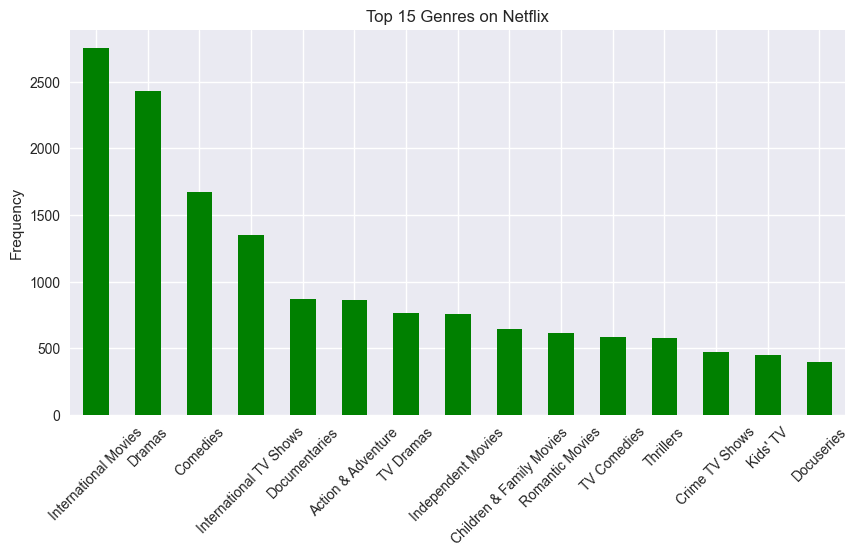

In [16]:
plt.figure(figsize=(10,5))
genre_counts.plot(kind='bar', color='green')
plt.title('Top 15 Genres on Netflix')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Top Producing Countries

In [17]:
countries = df['country'].str.split(', ').explode()
top_countries = countries.value_counts().head(10)

C:\Users\ARATI\AppData\Local\Temp\ipykernel_14596\3854993659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


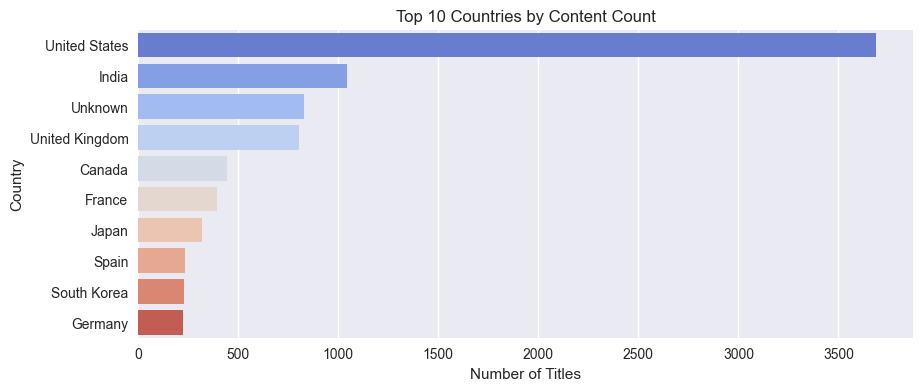

In [18]:
plt.figure(figsize=(10,4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

# Content Added Over Years

In [19]:
content_by_year = df['year_added'].value_counts().sort_index()

In [ ]:
plt.figure(figsize=(10,4))
content_by_year.plot(kind='line', marker='o')
plt.title('Netflix Content Growth by Year')
plt.xlabel('Year')
plt.ylabel('Titles Added')
plt.grid(True)
plt.show()

# Duration Analysis

Split movie and show

In [ ]:
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

Clean duration

In [ ]:
movies['duration_mins'] = movies['duration'].str.extract('(\d+)').astype(float)
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

Movie Duration

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(movies['duration_mins'].dropna(), bins=30, color='coral')
plt.title('Movie Duration Distribution (in minutes)')
plt.xlabel('Minutes')
plt.show()

# Rating Distribution

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

# Genre Word Cloud

In [ ]:
text = ' '.join(all_genres)
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(text)

In [ ]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Genres')
plt.show()